# Detecting Recurrence of Breast Cancer

Attribute Information:
   1. Class: no-recurrence-events, recurrence-events
   2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause: lt40, ge40, premeno.
   4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
   5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
   6. node-caps: yes, no.
   7. deg-malig: 1, 2, 3.
   8. breast: left, right.
   9. breast-quad: left-up, left-low, right-up,	right-low, central.
   10. irradiat:	yes, no.

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Importing the Dataset

In [2]:
dataset = pd.read_csv('D://Breast-Cancer.txt', sep=',', header=None)
dataset.columns= ["Class","age","menopause","tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiat"]

In [3]:
dataset.head(10)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


## Exploratory Data Analysis

### Checking the count for each Class

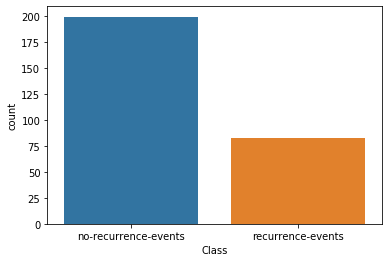

In [4]:
sns.countplot(x='Class', data=dataset)

### Count of each Class wrt age

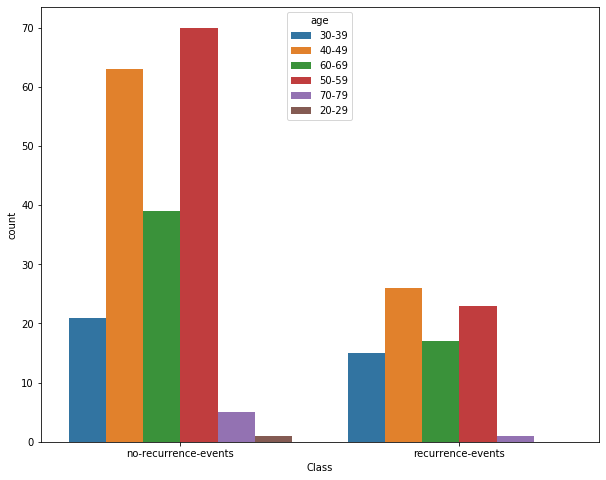

In [5]:
plt.figure(figsize=(10,8))
sns.countplot(x='Class', data=dataset, hue='age')

### Count of each Class wrt menopause

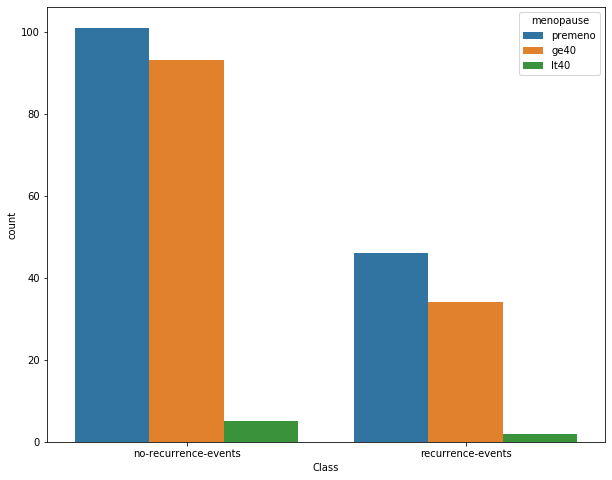

In [6]:
plt.figure(figsize=(10,8))
sns.countplot(x='Class', data=dataset, hue='menopause')

### Count of each Class wrt Tumor size

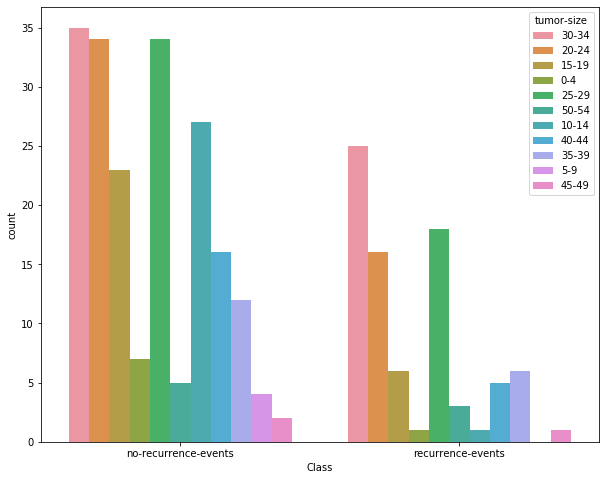

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(x='Class', data=dataset, hue='tumor-size')

### Count of each Class wrt Axillary lymph Nodes

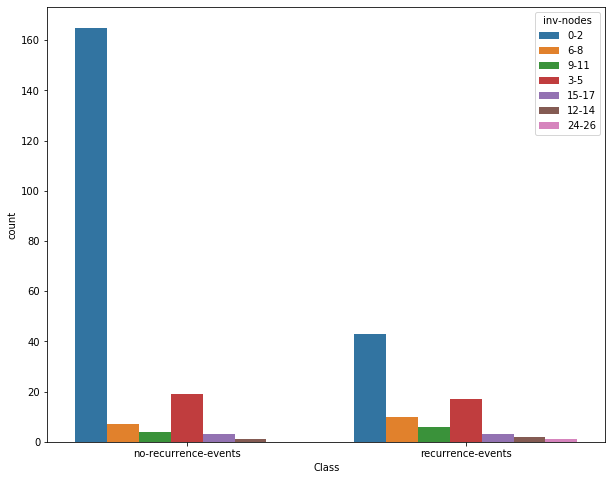

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(x='Class', data=dataset, hue='inv-nodes')

### Count of each Class wrt Node caps

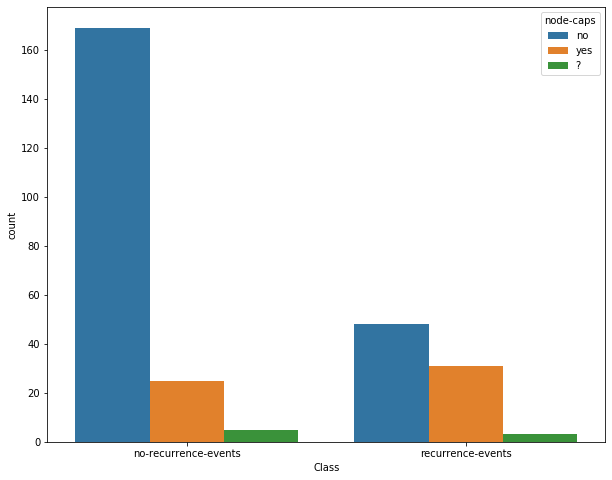

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(x='Class', data=dataset, hue='node-caps')

### Count of each Class wrt Degree of Malignancy (deg-malig)

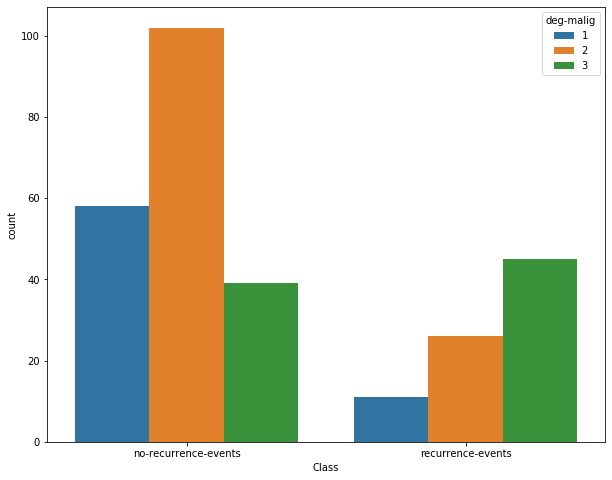

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x='Class', data=dataset, hue='deg-malig')

### Count of each Class wrt Breast

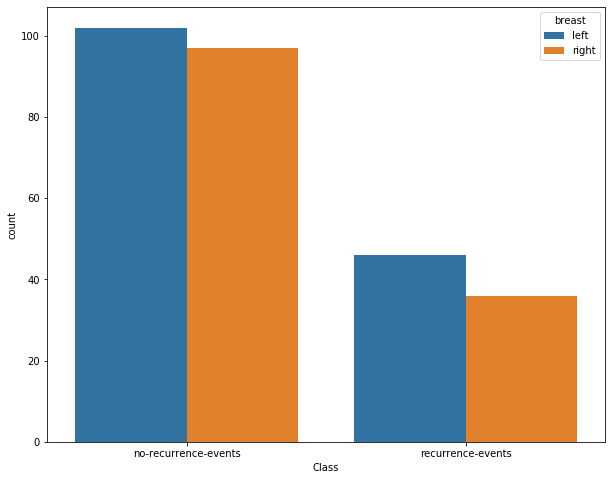

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(x='Class', data=dataset, hue='breast')

### Count of each Class wrt Breast Quadrant

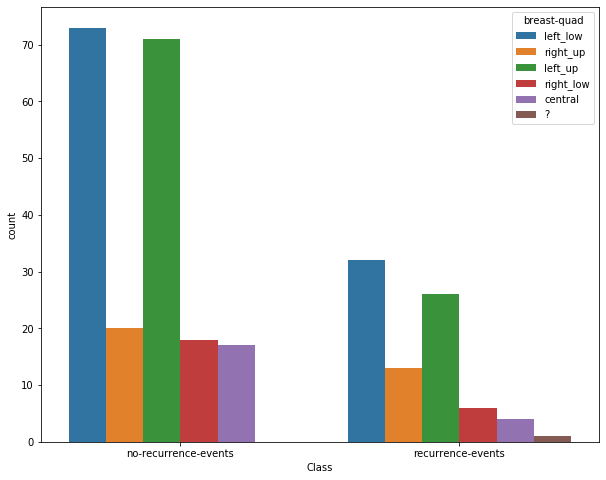

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x='Class', data=dataset, hue='breast-quad')

### Count of each Class wrt Irradiation

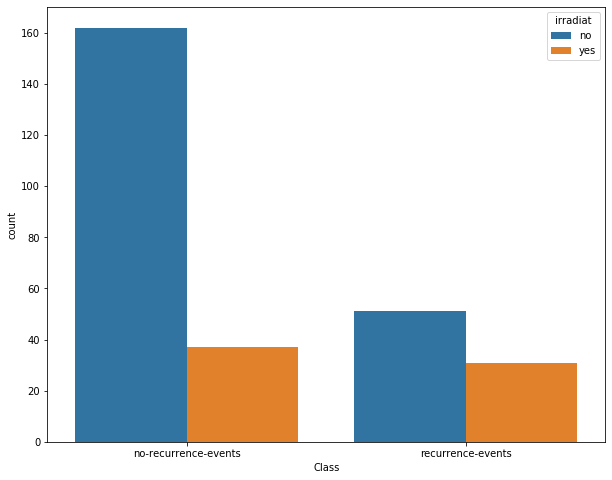

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x='Class', data=dataset, hue='irradiat')

## Results of EDA:

1. Younger Age groups seem to be more likely to be prone to Recurrent events

2. Menopause shows rather weak association, but can be considered for our purposes

3. Tumor Sizes of 20-34 tend to result in greater risk of recurrence

4. Lower Ranges in Auxilliary Lymph nodes tend to result in greater risk of recurrence

5. Presence of Node Caps tend to result in greater risk of recurrence

6. Higher degrees of Malignancy tend to result in greater risk of recurrence

7. Breast show no significant trends to predict the risk of recurrence

8. Breast Quadrant shows rather weak association, but can be considered for our purposes

9. Those who underwent Radiation therapy tend to result in greater risk of recurrence compared to those who haven't

## Preparing and Cleaning Data

In [37]:
X=pd.DataFrame()
X=dataset.copy()
X.drop(columns=["Class"], inplace=True)

In [38]:
X.head(10)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,40-49,premeno,20-24,0-2,no,2,right,left_up,no


In [39]:
Y=dataset["Class"]
Y.head(10)

0    no-recurrence-events
1    no-recurrence-events
2    no-recurrence-events
3    no-recurrence-events
4    no-recurrence-events
5    no-recurrence-events
6    no-recurrence-events
7    no-recurrence-events
8    no-recurrence-events
9    no-recurrence-events
Name: Class, dtype: object

### From the plot in the EDA we found that node-caps had some undefined values. As the category is binary, we will impute the values with the most common class: "No"

In [40]:
dataset[dataset['node-caps']=='?']

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
145,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
228,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
258,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no
259,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


In [41]:
X[X['node-caps']=='?']

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
145,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
228,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
258,50-59,lt40,20-24,0-2,?,1,left,left_up,no
259,50-59,lt40,20-24,0-2,?,1,left,left_low,no


In [42]:
X['node-caps'].replace(['?'],'no', inplace=True)

X[X['node-caps']=='?']

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat


### From the plot in the EDA we found that breast-quad had some missing data. It is imputed with the most common value: "left_low"

In [43]:
dataset[dataset['breast-quad']=='?']

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
201,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no


In [44]:
X['breast-quad'].replace(['?'],'left_low', inplace=True)

X[X['breast-quad']=='?']

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat


In [45]:
X.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no


### Dropping the column Breast 

In [46]:
X.drop(columns=['breast'], inplace=True)
X.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left_low,no
3,60-69,ge40,15-19,0-2,no,2,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right_low,no


### Encoding the Categorical Variables

In [47]:
from sklearn.preprocessing import LabelEncoder

labelsX={}
for x in X.columns:
    if x != 'deg-malign':
        labelencoder_X = LabelEncoder()
        X[x]=labelencoder_X.fit_transform(X[x])
        labelsX[x]=labelencoder_X

labelencoder_y = LabelEncoder()
Y=labelencoder_y.fit_transform(Y)

In [48]:
list(labelencoder_y.classes_)

['no-recurrence-events', 'recurrence-events']

In [49]:
for x in X.columns:
    print(x," : ",list(labelsX[x].classes_))

age  :  ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
menopause  :  ['ge40', 'lt40', 'premeno']
tumor-size  :  ['0-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '5-9', '50-54']
inv-nodes  :  ['0-2', '12-14', '15-17', '24-26', '3-5', '6-8', '9-11']
node-caps  :  ['no', 'yes']
deg-malig  :  [1, 2, 3]
breast-quad  :  ['central', 'left_low', 'left_up', 'right_low', 'right_up']
irradiat  :  ['no', 'yes']


## Training and Testing the ML Models

### Splitting training and testing data with a Test Proportion of 0.25

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Naive Bayes Classifier

In [52]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(classifier.score(X_test, y_test))

0.7183098591549296


In [54]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [55]:
cm

array([[40,  8],
       [12, 11]], dtype=int64)

### Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfs = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)	#using Random forest
rfs.fit(X_train, y_train)
print(rfs.score(X_test, y_test))

0.7605633802816901


In [58]:
y_pred_1=rfs.predict(X_test)

In [59]:
cm1 = confusion_matrix(y_test, y_pred_1)
cm1

array([[43,  5],
       [12, 11]], dtype=int64)

## Results:

#### 1. The Naive Bayes Classifier showed an accuracy of 71.831%
#### 2. The Random Forest Classifier showed an accuracy of 76.056%